# **Lab 4: Approximation**
**Anders Ågren Thuné**

# **Abstract**

Short summary of the lab report. State the objectives, methods used, main
results and conlusions.

# *About the code**

A short statement on who is the author of the file, and if the code is
distributed under a certain license.

In [1]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2019
# Anders Ågren Thuné (athune@kth.se)
# Johan Hoffman (jhoffman@kth.se)

# Code written by Anders Ågren Thuné based on the template by Johan Hoffman.

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need
additional modules, this is where you add them.

In [361]:
# Load neccessary modules.
import numpy as np
import numpy.linalg as la
import numpy.random as rd

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**

Give a short description of the problem investigated in the report, and provide
some background information so that the reader can understand the context.

Briefly describe what method you have chosen to solve the problem, and justify
why you selected that method.

Here you can express mathematics through Latex syntax, and use hyperlinks for
references.

[Hyperlink to DD2363 course website.](https://kth.instructure.com/courses/7500)

$
{\displaystyle \frac{\partial u}{\partial t}} + u\cdot \nabla u +\nabla p = f, \quad \nabla \cdot u=0$


# **Methods**

Describe the methods you used to solve the problem. This may be a combination of
text, mathematical formulas (Latex), algorithms (code), data and output.

In [291]:
def gq_1d(f, a, b):
    return f((a+b)/2)

In [287]:
def lagrange_i(x_i, h_i):
    return lambda x: (x_i - x)/h_i

In [288]:
def l2proj_1d(f, mesh):
    m = len(mesh)
    b = np.zeros(m)
    M = np.zeros((m,m))
    h = mesh[1:]-mesh[:-1]
    for i in range(m-1):
        M[i,i] += h[i]/3
        M[i,i+1] += h[i]/6
        M[i+1,i] += h[i]/6
        M[i+1,i+1] += h[i]/3

    b[0] = gq_1d(lambda x: -f(x)*lagrange_i(mesh[0],h[0])(x), mesh[0], mesh[1])
    for i in range(1,m-1):
        b[i] = gq_1d(lambda x: f(x)*lagrange_i(
            mesh[i],h[i-1])(x), mesh[i-1], mesh[i]) + gq_1d(
                lambda x: -f(x)*lagrange_i(mesh[i],h[i])(x), mesh[i], mesh[i+1])

    b[-1] = gq_1d(lambda x: f(x)*lagrange_i(mesh[-1],h[-1])(x), mesh[-2],mesh[-1])
    return la.solve(M, b)

In [18]:
def gq_2d(f, xs):
    M = np.array([[-xs[0,0]+xs[0,1], -xs[0,0]+xs[0,2]], [-xs[1,0]+xs[1,1], -xs[1,0]+xs[1,2]]])
    b = xs[:,0]
    return la.det(M)*f( M.dot([1/3,1/3]) + b )/2

In [360]:
def l2proj_2d(f, mesh):
    vertices = np.array([mesh.x, mesh.y])
    m = vertices.shape[1]
    b = np.zeros(m)
    M = np.zeros((m,m))
    for tr in mesh.triangles:
        for vert1 in range(3):
            b[tr[vert1]] += gq_2d(lambda x: f(x)/3, vertices[:,tr])
            for vert2 in range(3):
                M[tr[vert1],tr[vert2]] += gq_2d(lambda x: 1/9, vertices[:,tr])

    return la.solve(M,b)

# **Results**

Present the results. If the result is an algorithm that you have described under
the *Methods* section, you can present the data from verification and
performance tests in this section. If the result is the output from a
computational experiment this is where you present a selection of that data.

In [376]:
nr_of_tests = 1000
value_range = 100000

In [380]:
for _ in range(nr_of_tests):
    a, b = rd.randn(2)*rd.randint(value_range, size=2)
    f = lambda x: a*x + b
    assert gq_1d(f,0,1) == a/2+b

print("Cleared tests!")

Cleared tests!


In [358]:
linmesh = np.linspace(0,2*np.pi,10)
projpoints = l2proj_1d(np.sin, linmesh)

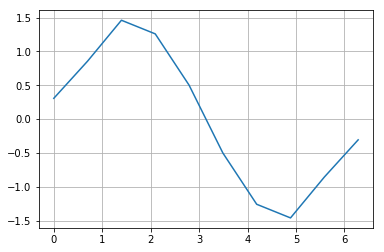

In [389]:
plt.plot(linmesh,projpoints)
plt.grid(True)

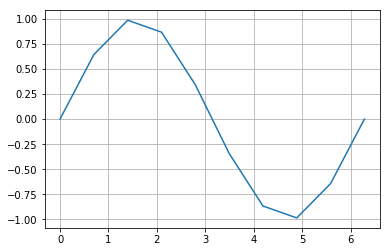

In [391]:
plt.plot(linmesh, np.sin(linmesh))
plt.grid(True)

In [266]:
la.norm(projpoints-np.sin(linmesh))

20.081583811685636

In [394]:
for _ in range(nr_of_tests):
    a, b, c = rd.randn(3)*rd.randint(value_range, size=3)
    f = lambda x: a*x[0] + b*x[1] + c
    assert np.isclose(gq_2d(f,np.array([[0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])),
                      a/6+b/6+c/2)

print("Cleared tests!")

Cleared tests!


In [413]:
Nx = 15
Ny = 15
hx = 1.0/(Nx-1)
hy = 1.0/(Ny-1)
x = np.zeros((Nx*Ny))
y = np.zeros((Nx*Ny))
for i in range(Nx):
  for j in range(Ny):
      x[i*Nx + j] = j*hx
      y[i*Nx + j] = i*hy

mesh = tri.Triangulation(x, y)

vertices = np.array([mesh.x, mesh.y])
sol = l2proj_2d(lambda x: np.sin(x[0]*5)+np.cos(x[1]*5), mesh)

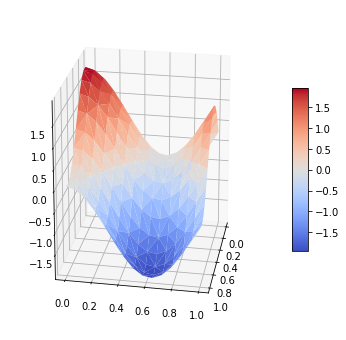

In [414]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_trisurf(mesh,(lambda x: np.sin(x[0]*5)+np.cos(x[1]*5))(vertices), cmap=plt.cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.view_init(20,10)
plt.show()

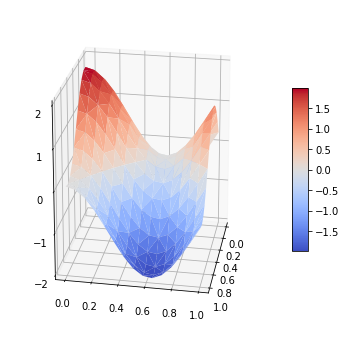

In [415]:
fig1 = plt.figure(figsize=(6,6))
ax1 = fig1.add_subplot(111, projection='3d')
surf1 = ax1.plot_trisurf(mesh, sol, cmap=plt.cm.coolwarm)
fig1.colorbar(surf1, shrink=0.5, aspect=10)
ax1.view_init(20,10)
plt.show()

In [284]:
la.norm((lambda x: np.sin(x[0]*5)+np.cos(x[1]*5))(vertices)-sol)

0.21261180763437032

In [402]:
xv = range(5,50)
yv1 = np.zeros(len(xv))
yv2 = np.zeros(len(xv))
for (idx,v) in enumerate(xv):
    Nx = v
    Ny = v
    hx = 1.0/(Nx-1)
    hy = 1.0/(Ny-1)
    x = np.zeros((Nx*Ny))
    y = np.zeros((Nx*Ny))
    for i in range(Nx):
        for j in range(Ny):
            x[i*Nx + j] = j*hx
            y[i*Nx + j] = i*hy

    mesh = tri.Triangulation(x, y)
    vertices = [mesh.x, mesh.y]
    sol1 = l2proj_2d(lambda x: np.sin(x[0]*5)+np.cos(x[1]*5), mesh)
    sol2 = l2proj_2d(lambda x: np.exp(x[0]+x[1])+x[0]*x[1], mesh)
    yv1[idx]=la.norm((lambda x: np.sin(x[0]*5)+np.cos(x[1]*5))(vertices)-sol1)
    yv2[idx]=la.norm((lambda x: np.exp(x[0]+x[1])+x[0]*x[1])(vertices)-sol2)

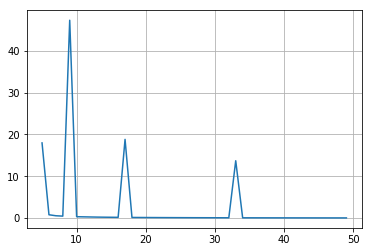

In [403]:
plt.plot(xv,yv1)
plt.grid(True)

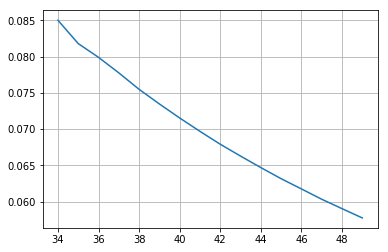

In [404]:
plt.plot(xv[29:],yv1[29:])
plt.grid(True)

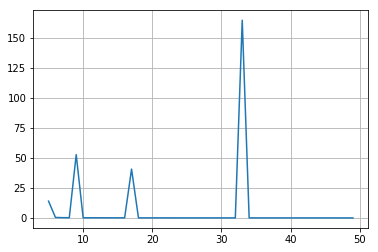

In [405]:
plt.plot(xv,yv2)
plt.grid(True)

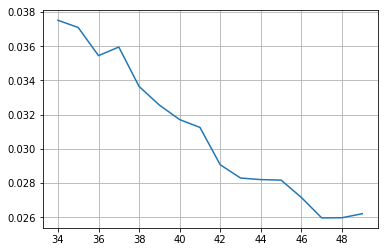

In [406]:
plt.plot(xv[29:],yv2[29:])
plt.grid(True)

# **Discussion**

Summarize your results and your conclusions. Were the results expected or
surprising. Do your results have implications outside the particular problem
investigated in this report?

# **APPENDIX**

In this appendix some examples are given to express and visualizing mathematical
concepts such as vectors, matrices, meshes and functions.

This is not part of the template report for the course.

# **Vector**

In this cell some basic commands are introduced for how to define and process a
vector, where the NumPy array data type is used.

x = [1 2 3 4]
x[2] = 3
x[0:2] = [1 2]
x.shape = (4,)
x.ndim = 1
x.size = 4
x.dtype = int64
x[ 0 ] = 1
x[ 1 ] = 2
x[ 2 ] = 3
x[ 3 ] = 4
x = [1 2 3 4]
xf = [1.  2.1 3.  4. ]
xf.dtype = float64
y = [2.+0.j 3.+0.j 4.+0.j]
y.dtype = complex128
z = [12.  16.5 21.  25.5]
z = [0.         1.57079633 3.14159265 4.71238898 6.28318531]


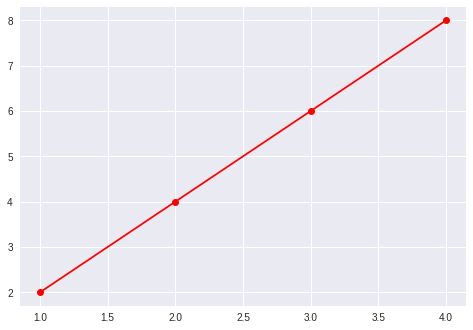

In [3]:
# Just a test
# Create a vector as a NumPy array
x = np.array([1,2,3,4])

# Print various attributes of the vector
print('x =',x)
print('x[2] =',x[2])
print('x[0:2] =',x[0:2])
print('x.shape =',x.shape)
print('x.ndim =',x.ndim)
print('x.size =',x.size)
print('x.dtype =',x.dtype)

# Print the elements of vector x
for i in range(x.size):
  print("x[",i,"] =",x[i])

# Assign a float value to the int vector x
x[1] = 2.1
print('x =',x)

# Copy the int vector x to a float vector xf
xf = x.astype(float)
xf[1] = 2.1
print('xf =',xf)
print('xf.dtype =',xf.dtype)

# Create a complex vector 
y = np.array([2,3,4], dtype=complex)
print('y =',y)
print('y.dtype =',y.dtype)

# Create a vector z by defining a range through an increment
z = np.arange(12, 28, 4.5)
print('z =',z)

# Overwrite the vector z by a vector of uniformly spaced elements in a range
pi=np.pi
pi
z = np.linspace(0, 2*pi, 5)
print('z =',z)

# Visualize the vector in a plot. 
plt.figure()
plt.plot(x,2*x,'ro-')
plt.show()

# **Matrix**

In this cell some basic commands for defining and processing a matrix is
introduced, where we use the NumPy array data type.

A = [[2 4 6]
 [3 6 9]
 [1 2 1]]
A[1,0] = 3
A.shape = (3, 3)
A.ndim = 2
A.size = 9
Sparse matrix values: 
 [3 2 2 2 1 1 3 2 1 2 3]
Sparse matrix column indices: 
 [1 2 4 2 3 3 3 4 5 5 6]
Sparse matrix row pointer: 
 [ 1  4  6  7  9 10]


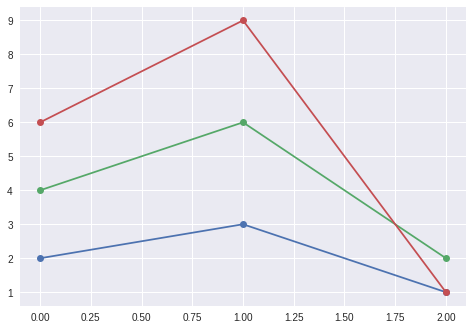

In [4]:
# Define a matrix as a NumPy array
A = np.array([[2,4,6], [3,6,9], [1,2,1]])

# Print various attributes of the matrix
print('A =',A)
print('A[1,0] =',A[1,0])
print('A.shape =',A.shape)
print('A.ndim =',A.ndim)
print('A.size =',A.size)

# Plot the matrix
plt.figure()
plt.plot(A,'o-')

# Construct a simple sparse matrix class using the CRS data structure
class spMatrix:
  def __init__(self, val, col_idx, row_ptr):
    self.val = val
    self.col_idx = col_idx
    self.row_ptr = row_ptr
    
# Create a sparse matrix object 
val = np.array([3, 2, 2, 2, 1, 1, 3, 2, 1, 2, 3])
col_idx = np.array([1, 2, 4, 2, 3, 3, 3, 4, 5, 5, 6])
row_ptr = np.array([1, 4, 6, 7, 9, 10])
spA = spMatrix(val, col_idx, row_ptr)

# Print sparse matrix object attributes
print('Sparse matrix values: \n',spA.val)
print('Sparse matrix column indices: \n',spA.col_idx)
print('Sparse matrix row pointer: \n',spA.row_ptr)
    

# **Function**

In this cell we illustrate how functions are defined. 

f(3,4) = 7
z = 13
z = 17
z = 14
A = [[1 2 3]
 [4 5 6]
 [7 8 9]]
A =
1  2  3  
4  5  6  
7  8  9  
A^T =
1  4  7  
2  5  8  
3  6  9  


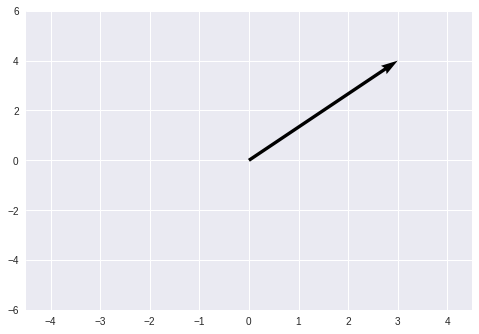

In [5]:
# Define a function f(x,y)
def f(x,y):
  return x + y 

# Verify the function output
print('f(3,4) =',f(3,4))

# Define a function of a function
def g1(fcn,arg1,arg2):
  z = fcn(arg1,arg2)
  print('z =',z)

# Call the function
g1(f,6,7)

# Define a function of a function with arguments in a list or array
def g2(fcn,arg):
  z = fcn(*arg)
  print('z =',z)
  
# Call the function with arguments as list and array
xlist = [8,9]
xarray = np.array([11,3])
g2(f,xlist)
g2(f,xarray)

# Define a function to format the print out for a matrix 
def printMatrix(A):
   rows = A.shape[0]
   cols = A.shape[1]
   for i in range(0,rows):
      for j in range(0,cols):
         print(A[i,j]," ", end='')
      print()

# Define matrix      
A = np.array([[1,2,3], [4,5,6], [7,8,9]])

# Verify the function output
print('A =', A)
print('A =')
printMatrix(A)
print('A^T =')
printMatrix(A.transpose())

# Plot a Euclidian position vector v 
def plotEVector(vec):
  plt.figure()
  plt.xlim([-1.5*vec[0], 1.5*vec[0]])
  plt.ylim([-1.5*vec[1], 1.5*vec[1]])
  plt.quiver(0, 0, vec[0], vec[1], scale=1, scale_units='xy', angles='xy')
  plt.show()

v = np.array([3,4])
plotEVector(v)




# **Plot**

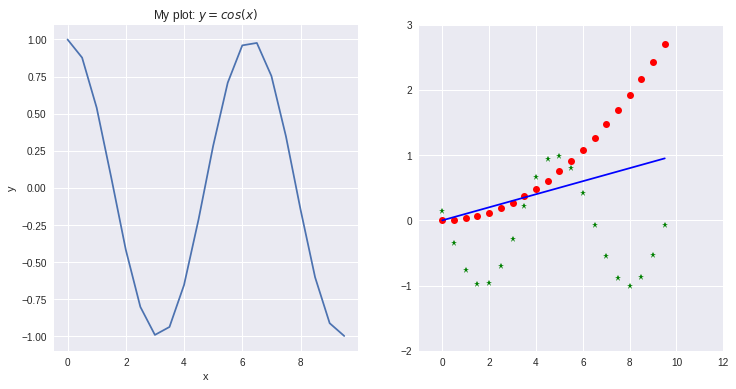

In [6]:
# Define a range for a parameter t
t = np.arange( 0.0, 10, 0.5)

# Initialize a new figure and set the size 
plt.figure(2)
plt.figure(figsize=(12,6))

# Define a subplot structure and choose the first subplot 
plt.subplot(121)

# Plot a standard NumPy function against the parameter t
plt.plot(t,np.cos(t))

# Set plot labels and title for the subplot
plt.xlabel('x')
plt.ylabel('y')
plt.title('My plot: $y = cos(x)$')

# Choose the other subplot
plt.subplot(122)

# Plot three functions in the same subplot
plt.plot(t, np.sin(f(t,3)), 'g*', t, 0.03*t**2, 'ro', t, 0.1*t, 'b')
plt.axis([-1, 12, -2 ,3])

# Show the figure
plt.show()

# Triangular **mesh**

This cell describes how to generate a triangular mesh from a point cloud by the Delaunay algorithm. It also illustrates how to access the mesh data structures. 

Mesh generation took:  0.0008509159088134766 seconds (wall-clock time)
vertices = 
 [[0.   0.25 0.5  0.75 1.   0.   0.25 0.5  0.75 1.   0.   0.25 0.5  0.75
  1.   0.   0.25 0.5  0.75 1.   0.   0.25 0.5  0.75 1.  ]
 [0.   0.   0.   0.   0.   0.25 0.25 0.25 0.25 0.25 0.5  0.5  0.5  0.5
  0.5  0.75 0.75 0.75 0.75 0.75 1.   1.   1.   1.   1.  ]]
edges = 
 [[ 1  0]
 [ 2  1]
 [ 3  2]
 [ 4  3]
 [ 5  0]
 [ 5  1]
 [ 6  1]
 [ 6  5]
 [ 7  1]
 [ 7  2]
 [ 7  3]
 [ 7  6]
 [ 8  3]
 [ 8  7]
 [ 9  3]
 [ 9  4]
 [ 9  8]
 [10  5]
 [11  5]
 [11  6]
 [11  7]
 [11 10]
 [12  7]
 [12 11]
 [13  7]
 [13  8]
 [13  9]
 [13 12]
 [14  9]
 [14 13]
 [15 10]
 [15 11]
 [16 11]
 [16 15]
 [17 11]
 [17 12]
 [17 13]
 [17 16]
 [18 13]
 [18 17]
 [19 13]
 [19 14]
 [19 18]
 [20 15]
 [21 15]
 [21 16]
 [21 17]
 [21 20]
 [22 17]
 [22 21]
 [23 17]
 [23 18]
 [23 19]
 [23 22]
 [24 19]
 [24 23]]
triangles = 
 [[ 0  1  5]
 [ 5  1  6]
 [ 9  3  4]
 [ 8  3  9]
 [ 6  1  7]
 [ 7  1  2]
 [ 7  3  8]
 [ 2  3  7]
 [20 15 21]
 [21 15 16]
 [ 6  7

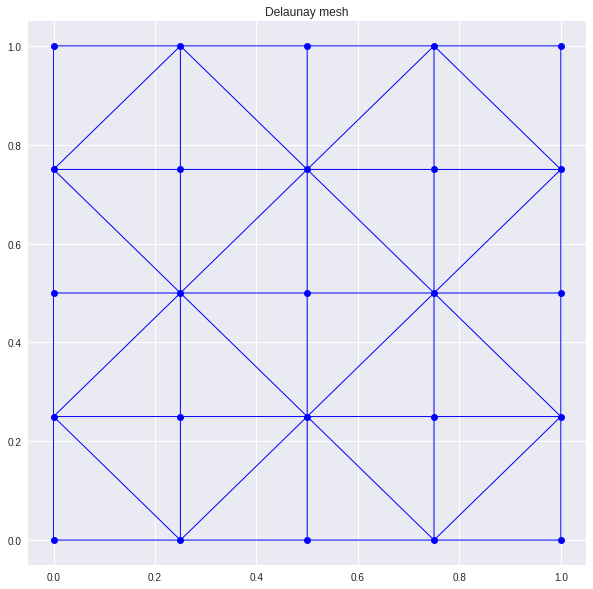

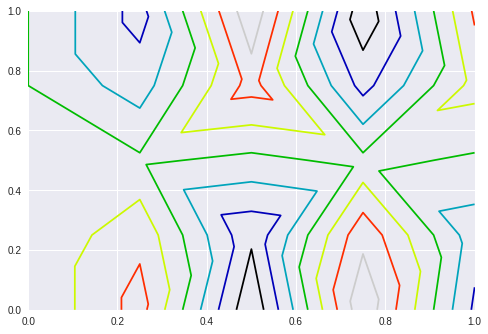

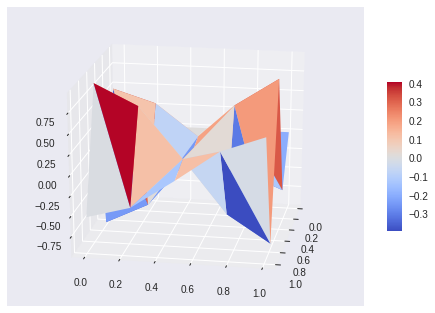

In [7]:
# Start the clock 
start = time.time()

# Generate a point cloud
Nx = 5
Ny = 5
hx = 1.0/(Nx-1)
hy = 1.0/(Ny-1)
x = np.zeros((Nx*Ny))
y = np.zeros((Nx*Ny))
for i in range(Nx):
  for j in range(Ny):
    x[i*Nx + j] = j*hx
    y[i*Nx + j] = i*hy

# Generate a mesh from the point cloud using a Delaunay algorithm
mesh = tri.Triangulation( x, y )

# Stop the clock
end = time.time()

# Print the measured time
print ("Mesh generation took: ", end - start, "seconds (wall-clock time)")

# Print mesh data structure
vertices = np.array([mesh.x, mesh.y])
print('vertices = \n', vertices)
print('edges = \n', mesh.edges)
print('triangles = \n', mesh.triangles)
print('neighbor triangles = \n', mesh.neighbors)

# Plot the mesh 
plt.figure(3)
plt.figure(figsize=(10,10))
plt.triplot(mesh, 'bo-', lw=1)
plt.title('Delaunay mesh')
plt.show()

# Define a function g(x,y)
def g(x,y):
    return np.sin(10*x)*np.cos(3*y)

# Plot the function g(x,y) in a contour plot
plt.figure(4)
plt.tricontour(mesh, g(x,y), cmap=plt.cm.spectral)
plt.show()

# Plot the function g(x,y) in 3D as a surface plot
fig = plt.figure(5)
ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_trisurf(mesh, g(x,y), cmap=plt.cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=10)
ax1.view_init(20,10)
plt.show()

# Parametric **curve**

This cell illustrates how to visualize a parametric curve.

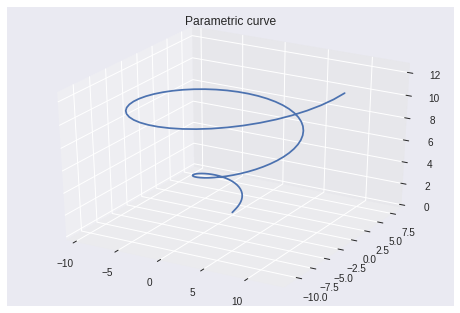

In [8]:
# Define paramter range
t = np.linspace(0, 4*np.pi, 100)

# Define the curve
x = t*np.cos(t)
y = t*np.sin(t)
z = t

fig = plt.figure(6)
ax = fig.gca(projection = '3d')
ax.plot(x, y, z)
plt.title('Parametric curve')
plt.show()